In [1]:
#Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [5]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading image')
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
#Build a CNN model

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [12]:
#Compile the model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
#Train and validate te model and save

In [17]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 93s 92ms/step - loss: 3.5968 - accuracy: 0.0532 - val_loss: 3.4833 - val_accuracy: 0.0574
Epoch 2/15
981/981 [==============================] - 84s 86ms/step - loss: 3.4978 - accuracy: 0.0562 - val_loss: 3.4804 - val_accuracy: 0.0576
Epoch 3/15
981/981 [==============================] - 83s 85ms/step - loss: 3.4964 - accuracy: 0.0559 - val_loss: 3.4795 - val_accuracy: 0.0574
Epoch 4/15
981/981 [==============================] - 83s 85ms/step - loss: 3.4957 - accuracy: 0.0542 - val_loss: 3.4794 - val_accuracy: 0.0574
Epoch 5/15
981/981 [==============================] - 84s 86ms/step - loss: 3.4954 - accuracy: 0.0556 - val_loss: 3.4791 - val_accuracy: 0.0576
Epoch 6/15
981/981 [==============================] - 80s 82ms/step - loss: 3.4927 - accuracy: 0.0535 - val_loss: 3.4799 - val_accuracy: 0.0471
Epoch 7/15
981/981 [==============================] - 80s 82ms/step - loss: 3.4965 - accuracy: 0.0568 - val_loss: 3.4777 - val_accuracy:

In [18]:
model.save('my_model.h5')

In [19]:
#Plotting graphs for accuracy

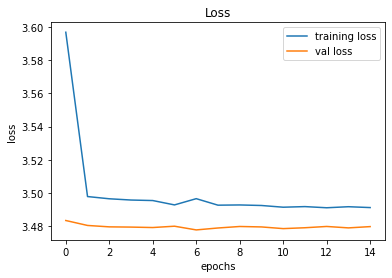

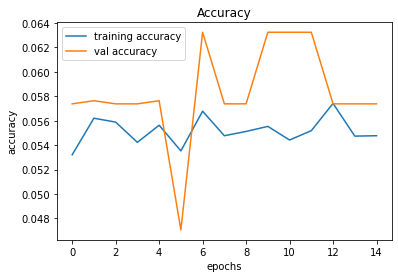

In [32]:
plt.figure(0)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [21]:
#Testing accuracy on test dataset

In [27]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
#Accuracy with the test data

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.05938242280285035


In [33]:
#save the model

In [34]:
model.save('traffic_classifier.h5')